In [1]:
!pip install google-cloud-bigquery

In [43]:
import os
from google.cloud import bigquery


In [44]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "spherical-elf-439315-p3-7fc7b14b76c4.json"


In [46]:
# Inicializa el cliente de BigQuery
client = bigquery.Client()

In [52]:
import matplotlib.pyplot as plt

#Simple Consulta

<ipython-input-87-891a6ce2c613>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')




Resultados de la consulta:
Año: 2008, Total Preguntas: 57,569
Año: 2009, Total Preguntas: 341,651
Año: 2010, Total Preguntas: 690,840
Año: 2011, Total Preguntas: 1,189,881
Año: 2012, Total Preguntas: 1,629,386
Año: 2013, Total Preguntas: 2,033,690
Año: 2014, Total Preguntas: 2,137,435
Año: 2015, Total Preguntas: 2,196,676
Año: 2016, Total Preguntas: 2,200,802
Año: 2017, Total Preguntas: 2,116,212
Año: 2018, Total Preguntas: 1,888,989
Año: 2019, Total Preguntas: 1,766,933
Año: 2020, Total Preguntas: 1,871,695
Año: 2021, Total Preguntas: 1,629,580
Año: 2022, Total Preguntas: 1,268,788






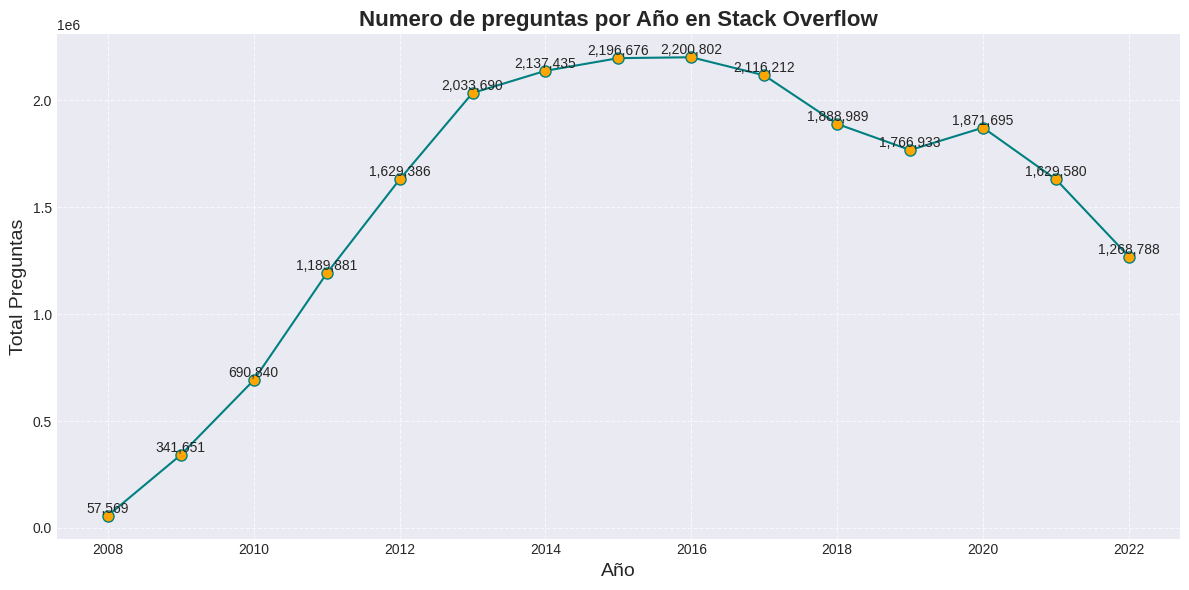

In [87]:
from google.cloud import bigquery
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
plt.style.use('seaborn-darkgrid')
sns.set_palette("muted")
plt.rcParams['figure.figsize'] = (12, 6)

# Función para generar los gráficos con etiquetas
def plot_graph_with_values(x, y, title, xlabel, ylabel, line_color='b', marker_color='r'):
    fig, ax = plt.subplots()

    # Gráfico de línea con marcadores
    ax.plot(x, y, color=line_color, marker='o', markersize=8, markerfacecolor=marker_color)

    # Añadir los valores sobre cada punto del gráfico
    for i in range(len(x)):
        ax.text(x[i], y[i], f'{y[i]:,}', fontsize=10, ha='center', va='bottom')

    # Configuración del gráfico
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Crea un cliente de BigQuery
client = bigquery.Client()

# Consulta 1: Número de preguntas por año
query_1 = """
    SELECT
      EXTRACT(YEAR FROM creation_date) AS year,
      COUNT(*) AS total_questions
    FROM
      `bigquery-public-data.stackoverflow.posts_questions`
    GROUP BY
      year
    ORDER BY
      year;
"""
# Ejecuta la consulta
query_job_1 = client.query(query_1)
results_1 = query_job_1.result()

# Extrae los resultados de la primera consulta
years_1 = []
total_questions = []
for row in results_1:
    years_1.append(row.year)
    total_questions.append(row.total_questions)

print("\n")

# Imprimir resultados en la consola
print("Resultados de la consulta:")
for year, total in zip(years_1, total_questions):
    print(f"Año: {year}, Total Preguntas: {total:,}")

print("\n")

print("==================================================================")

print("\n")


# Gráfico para la primera consulta: Preguntas por año con valores
plot_graph_with_values(
    years_1, total_questions,
    title='Numero de preguntas por Año en Stack Overflow',
    xlabel='Año', ylabel='Total Preguntas',
    line_color='teal', marker_color='orange'
)




Resultados de la consulta:
Año: 2008, Usuarios Activos: 12,988
Año: 2009, Usuarios Activos: 57,794
Año: 2010, Usuarios Activos: 159,682
Año: 2011, Usuarios Activos: 285,865
Año: 2012, Usuarios Activos: 405,790
Año: 2013, Usuarios Activos: 572,974
Año: 2014, Usuarios Activos: 661,226
Año: 2015, Usuarios Activos: 727,762
Año: 2016, Usuarios Activos: 763,660
Año: 2017, Usuarios Activos: 790,927
Año: 2018, Usuarios Activos: 755,625
Año: 2019, Usuarios Activos: 742,367
Año: 2020, Usuarios Activos: 786,442
Año: 2021, Usuarios Activos: 733,227
Año: 2022, Usuarios Activos: 631,946






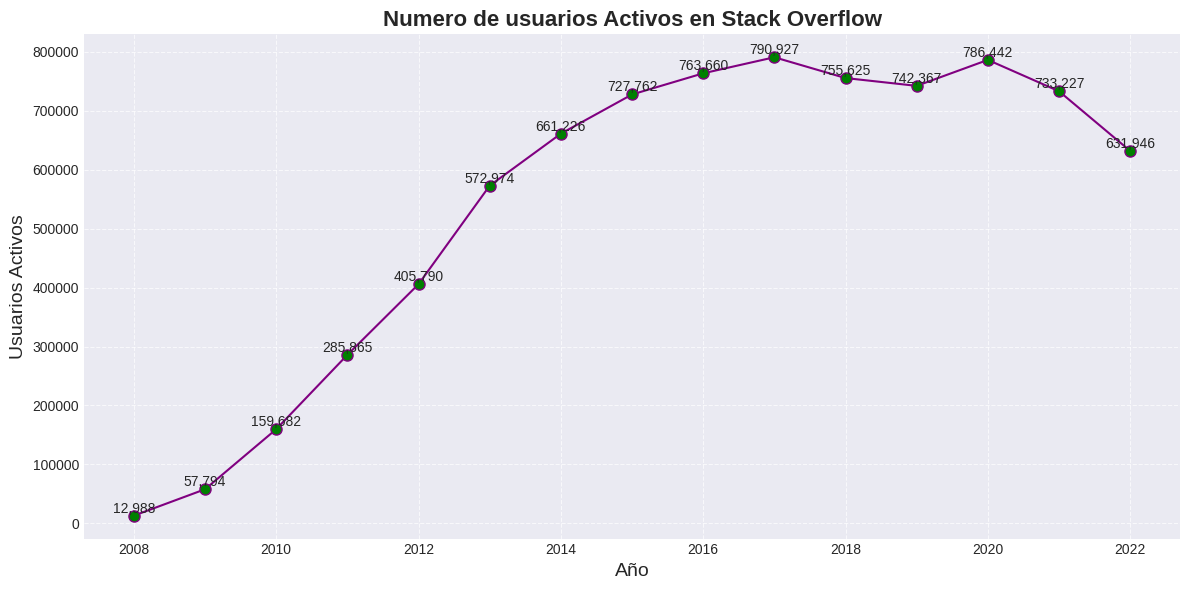

In [88]:
# Consulta 2: Número de usuarios activos por año
query_2 = """
    SELECT
      EXTRACT(YEAR FROM creation_date) AS year,
      COUNT(DISTINCT owner_user_id) AS active_users
    FROM
      `bigquery-public-data.stackoverflow.posts_questions`
    GROUP BY
      year
    ORDER BY
      year;
"""
# Ejecuta la consulta
query_job_2 = client.query(query_2)
results_2 = query_job_2.result()

# Extrae los resultados de la segunda consulta
years_2 = []
active_users = []
for row in results_2:
    years_2.append(row.year)
    active_users.append(row.active_users)

print("\n")

# Imprimir resultados en la consola
print("Resultados de la consulta:")
for year, total in zip(years_2, active_users):
    print(f"Año: {year}, Usuarios Activos: {total:,}")

print("\n")

print("==================================================================")

print("\n")


# Gráfico para la segunda consulta: Usuarios activos por año con valores
plot_graph_with_values(
    years_2, active_users,
    title='Numero de usuarios Activos en Stack Overflow',
    xlabel='Año', ylabel='Usuarios Activos',
    line_color='purple', marker_color='green'
)


#Consultas con JOIN

In [95]:
!pip install pyspark
!pip install google-cloud-bigquery[pandas]


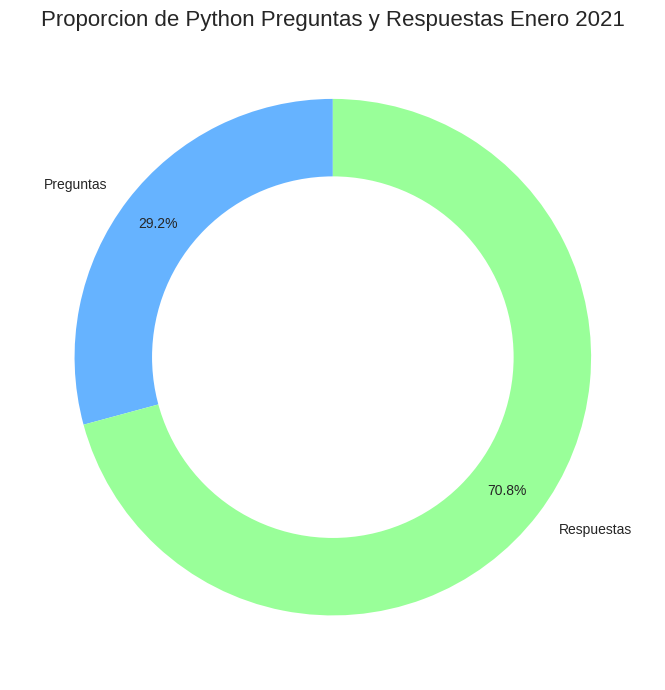

In [89]:
from google.cloud import bigquery
import matplotlib.pyplot as plt

# Crea un cliente de BigQuery
client = bigquery.Client()

# Ejecuta la consulta
query = """
SELECT
  COUNT(DISTINCT q.id) AS total_questions,  -- Contamos el número de preguntas distintas
  COUNT(a.id) AS total_answers  -- Contamos el número de respuestas
FROM
  `bigquery-public-data.stackoverflow.posts_questions` q
LEFT JOIN
  `bigquery-public-data.stackoverflow.posts_answers` a
ON
  q.id = a.parent_id
WHERE
  LOWER(q.title) LIKE '%python%'
  AND q.creation_date BETWEEN '2022-01-01' AND '2022-01-31'
  AND q.answer_count > 1;
"""
query_job = client.query(query)
results = query_job.result()

# Extraer resultados
for row in results:
    total_questions = row.total_questions
    total_answers = row.total_answers

# Datos para el gráfico de dona
labels = ['Preguntas', 'Respuestas']
sizes = [total_questions, total_answers]
colors = ['#66b3ff', '#99ff99']

# Crear gráfico de dona
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Círculo en el centro para crear efecto de dona
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Ajustes finales
plt.title('Proporcion de Python Preguntas y Respuestas Enero 2021', fontsize=16)
plt.tight_layout()
plt.show()


In [107]:
from google.cloud import bigquery

# Crea un cliente de BigQuery
client = bigquery.Client()

# consulta SQL

query = """
SELECT
  q.id AS q_id,   -- ID de la pregunta en la tabla de preguntas
  a.id AS a_id,   -- ID de la respuesta en la tabla de respuestas
  q.title AS q_title,  -- Título de la pregunta
  q.tags AS q_tags,  -- Etiquetas de la pregunta
  q.creation_date AS q_creation_date,  -- Fecha de creación de la pregunta
  q.score AS q_score,  -- Puntuación de la pregunta
  q.answer_count AS q_answer_count,  -- Número de respuestas a la pregunta

FROM
  `bigquery-public-data.stackoverflow.posts_questions` q
LEFT JOIN
  `bigquery-public-data.stackoverflow.posts_answers` a
ON
  q.id = a.parent_id  -- Se unen las preguntas con las respuestas usando el ID de la pregunta
WHERE
  LOWER(q.title) LIKE '%pandas%'  -- Se buscan preguntas cuyo título contenga 'pandas'
  AND q.creation_date BETWEEN '2021-01-01' AND '2021-01-31'  -- Preguntas creadas en enero de 2021
  AND q.answer_count > 1 limit 2  -- Preguntas con más de una respuesta
"""

# Ejecuta la consulta
query_job = client.query(query)

# Muestra los resultados
for row in query_job:
    print(f"Question ID: {row.q_id}")
    print(f"Answer ID: {row.a_id}")
    print(f"Title: {row.q_title}")
    print(f"Tags: {row.q_tags}")
    print(f"Creation Date: {row.q_creation_date}")
    print(f"Score: {row.q_score}")
    print(f"Answer Count: {row.q_answer_count}")
    print("="*40)  # Separador entre los resultados


Question ID: 65559423
Answer ID: 65559476
Title: Count number of np.nan in a Pandas dataframe
Tags: python|pandas|dataframe|numpy
Creation Date: 2021-01-04 08:05:37.760000+00:00
Score: 4
Answer Count: 2
Question ID: 65559423
Answer ID: 65559455
Title: Count number of np.nan in a Pandas dataframe
Tags: python|pandas|dataframe|numpy
Creation Date: 2021-01-04 08:05:37.760000+00:00
Score: 4
Answer Count: 2


<ipython-input-78-6da76e02b60d>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


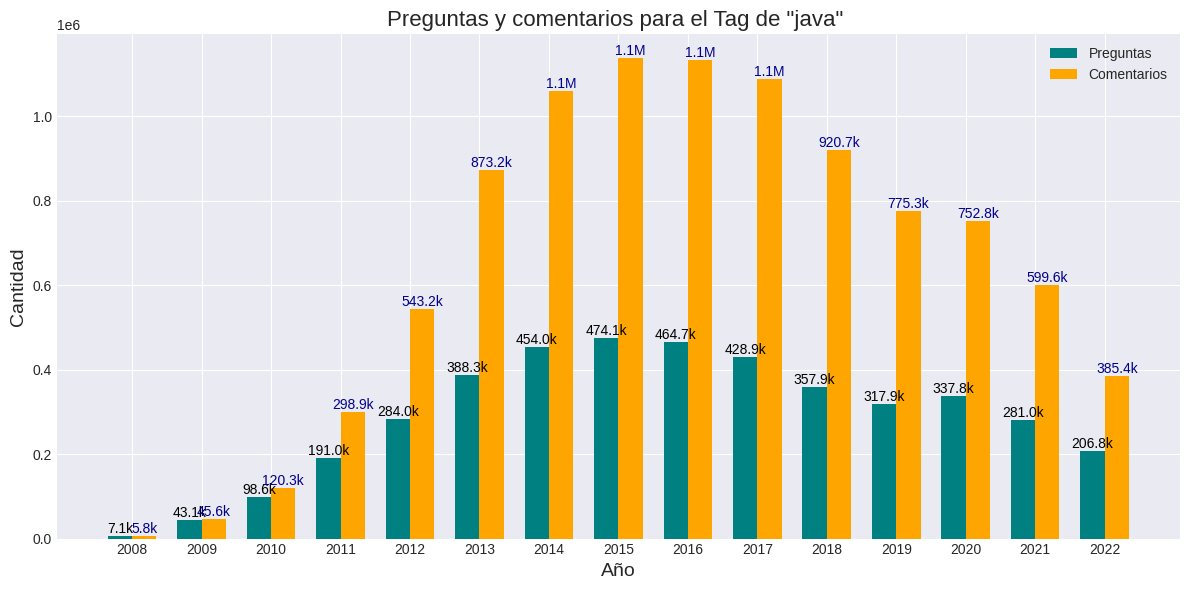

In [78]:
from google.cloud import bigquery
import matplotlib.pyplot as plt
import seaborn as sns

# Función para abreviar los números grandes
def abbreviate_number(num):
    if num >= 1_000_000:
        return f'{num/1_000_000:.1f}M'
    elif num >= 1_000:
        return f'{num/1_000:.1f}k'
    else:
        return str(num)

# Configuración del estilo de gráficos
plt.style.use('seaborn-darkgrid')
sns.set_palette("muted")
plt.rcParams['figure.figsize'] = (12, 6)

# Crea un cliente de BigQuery
client = bigquery.Client()

# Ejecuta la consulta SQL
query = """
WITH agg_comments AS (
    SELECT post_id, ARRAY_AGG(STRUCT(id, text)) AS comments, COUNT(id) AS comment_count
    FROM `bigquery-public-data.stackoverflow.comments`
    GROUP BY post_id
)
SELECT
    EXTRACT(YEAR FROM q.creation_date) AS year,
    COUNT(DISTINCT q.id) AS total_questions,
    SUM(IF(c.post_id IS NOT NULL, c.comment_count, 0)) AS total_comments
FROM
    `bigquery-public-data.stackoverflow.posts_questions` AS q
LEFT JOIN
    agg_comments AS c
ON
    q.id = c.post_id
WHERE
    REGEXP_CONTAINS(q.tags, 'java')
GROUP BY
    year
ORDER BY
    year;
"""
query_job = client.query(query)
results = query_job.result()

# Extraer resultados
years = []
total_questions = []
total_comments = []
for row in results:
    years.append(row.year)
    total_questions.append(row.total_questions)
    total_comments.append(row.total_comments)

# Crear gráfico de barras
width = 0.35  # Ancho de las barras

fig, ax = plt.subplots()

# Posiciones de las barras
r1 = range(len(years))
r2 = [x + width for x in r1]

# Barras para preguntas
bars1 = ax.bar(r1, total_questions, width=width, label='Preguntas', color='teal')

# Barras para comentarios
bars2 = ax.bar(r2, total_comments, width=width, label='Comentarios', color='orange')

# Añadir los valores numéricos encima de cada barra, formateados
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, abbreviate_number(yval), va='bottom', ha='center', fontsize=10, color='black')

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, abbreviate_number(yval), va='bottom', ha='center', fontsize=10, color='darkblue')

# Configuración de las etiquetas y el gráfico
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Cantidad', fontsize=14)
ax.set_title('Preguntas y comentarios para el Tag de "java" ', fontsize=16)
ax.set_xticks([r + width / 2 for r in range(len(years))])
ax.set_xticklabels(years)
ax.legend()

plt.tight_layout()
plt.show()
